# Library setup

In [ ]:
!pip install ipython-autotime # To measure the execution time of our code
 
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.27 s (started: 2021-04-04 22:53:25 +00:00)


In [ ]:
import os # To allow us to set the working directory

time: 1.03 ms (started: 2021-04-04 22:17:10 +00:00)


### Change working directory to your current folder

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 42.2 s (started: 2021-04-04 22:17:10 +00:00)


In [ ]:
# Change working directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/')

time: 409 ms (started: 2021-04-04 22:17:52 +00:00)


In [ ]:
# Check whether the working directory was changed
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic'

time: 3.96 ms (started: 2021-04-04 22:17:53 +00:00)


### Import OpenCV

In [ ]:
# Import OpenCV
import cv2

# Check if the version of OpenCV is at least version 4.5
cv2.__version__

'4.5.2-dev'

time: 3.34 s (started: 2021-04-04 22:17:53 +00:00)


### Install cvlib

In [3]:
! pip install cvlib

     |████████████████████████████████| 10.1MB 7.6MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-cp37-none-any.whl size=10044621 sha256=3325b28db3afea262052e33c68e66a0692dbb59eec077a656dc179cf8b15f733
  Stored in directory: /root/.cache/pip/wheels/5e/a4/99/8dfcae03a6f93bb4084650d0b642ef5a472429928fb95ffd01
  Created wheel for progressbar: filename=progressbar-2.5-cp37-none-any.whl size=12076 sha256=328196ac155a73b96916ee6c51825aa9b32cfeea79163915c17b64d27c9e3c5b
  Stored in directory: /root/.cache/pip/wheels/c0/e9/6b/ea01090205e285175842339aa3b491adeb4015206cda272ff0
Successfully built cvlib progressbar


### Import libraries


In [4]:
import cvlib as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cvlib.object_detection import draw_bbox

### Read the two CSVs as DataFrames

In [ ]:
# Read the 2019 and 2020 CSVs and drop the old index values

jan2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/future_results_2019_full.csv')
jan2019 = jan2019.drop(columns='Unnamed: 0')

jan2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/future_results_2020_full.csv')
jan2020 = jan2020.drop(columns='Unnamed: 0')

# Single image analysis

### Read first image from the 2019 folder

In [ ]:
img0_2019 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/0.jpg')

time: 1min 56s (started: 2021-04-04 22:18:17 +00:00)


### Detect common objects

In [ ]:
bbox, label, conf = cv.detect_common_objects(img0_2019, model='yolov4', enable_gpu=True)

time: 18.5 s (started: 2021-04-04 22:22:05 +00:00)


### Check the length of the label (number of cars)

In [ ]:
print(len(label))

6
time: 1.15 ms (started: 2021-04-04 07:44:17 +00:00)


### Draw bounding box in image
Although we won't be plotting the bounding boxes hereon, we can visualize how the cars are detected in the first image by adding bounding boxes.

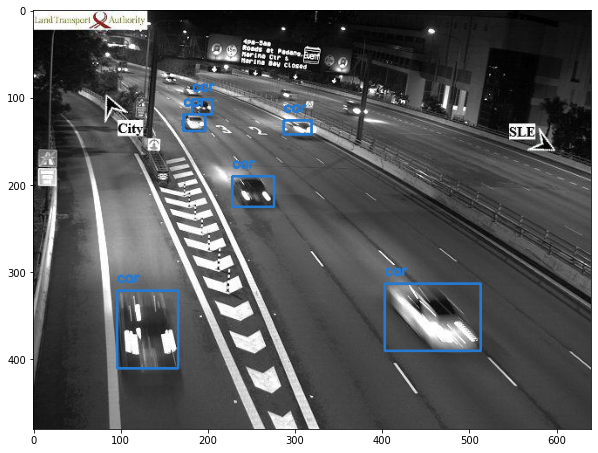

time: 416 ms (started: 2021-04-04 07:44:17 +00:00)


In [ ]:
# Draw bounding box
boxed_img0_2019 = draw_bbox(img0_2019, bbox, label, conf)

# Plot the output image with .imshow
plt.figure(figsize=(10, 15))
plt.imshow(boxed_img0_2019)

# Full image analysis
### Write getLabelCount

In [ ]:
def getLabelCount(index, folder_path):
    temp_path = folder_path + str(index) + '.jpg' # Take the specified path and combine it with the index value and the .jpg file extension
    try:
      temp_img = cv2.imread(temp_path) # Open the image contained in the temporary path
      bbox, label, conf = cv.detect_common_objects(temp_img, model='yolov4', enable_gpu=True) # Demarcate the cars detected in the image
      return len(label) # Return the count of detected cars
    except:
      label = [] # Return an empty label if no cars are detected

time: 2.52 ms (started: 2021-04-04 22:22:35 +00:00)


### Test the getLabelCount function

In [ ]:
# Test getLabelCount on the first image
getLabelCount(0, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/')

6

time: 99.3 ms (started: 2021-04-04 02:16:39 +00:00)


In [ ]:
# Test getLabelCount on the first five images
for index in range(0,5):
  print(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/'))

6
3
2
5
4
time: 459 ms (started: 2021-04-04 02:20:30 +00:00)


### Step 14: Get a list of getLabelCount for 2019

In [ ]:
# Create a list where the tuples containing label counts will be stored
labelCount2019 = []

# Get the label counts for the first batch of images
# The car detection will be performed in batches to prevent Google Colab from crashing
for index in range(0,6000):
  try:
    labelCount2019.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/'))
  except:
    pass

time: 26min 6s (started: 2021-04-04 02:28:48 +00:00)


In [ ]:
# Check the cumulative number of label counts stored
len(labelCount2019)

6000

time: 5.38 ms (started: 2021-04-04 02:55:04 +00:00)


In [ ]:
# Get the label counts for the next batch of images
for index in range(6000,12000):
  try:
    labelCount2019.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/'))
  except:
    pass

# Check the cumulative number of label counts stored
len(labelCount2019)

12000

time: 26min 16s (started: 2021-04-04 02:55:28 +00:00)


In [ ]:
# Get the label counts for the next batch of images
for index in range(12000,18000):
  try:
    labelCount2019.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/'))
  except:
    pass

# Check the cumulative number of label counts stored
len(labelCount2019)

18000

time: 26min 18s (started: 2021-04-04 03:32:40 +00:00)


In [ ]:
# Get the label counts for the next batch of images
for index in range(18000,24000):
  try:
    labelCount2019.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/'))
  except:
    pass

# Check the cumulative number of label counts stored
len(labelCount2019)

24000

time: 26min 21s (started: 2021-04-04 03:59:42 +00:00)


In [ ]:
FOLDER_PATH = 'car_image_2019_Jan'
ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/'

# Count the number of images stored in Google Drive and store it in a variable
imgCount2019 = len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)))

# Get the vehicle counts for the remaining images in the folder up to the penultimate image
for index in range(24000, imgCount2019):
  try:
    labelCount2019.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/'))
  except:
    pass

# Check the cumulative number of label counts stored
len(labelCount2019)

30233

time: 27min 27s (started: 2021-04-04 04:55:19 +00:00)


In [ ]:
# Get the label count for the last image
labelCount2019.append(getLabelCount((imgCount2019), '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2019_Jan/'))

# Check the cumulative number of label counts stored
len(labelCount2019)

30234

time: 433 ms (started: 2021-04-04 05:39:05 +00:00)


### Add the label counts to the 2019 DataFrame

In [ ]:
# Add a new column named num_cars
jan2019['num_cars'] = labelCount2019

time: 12 ms (started: 2021-04-04 05:39:19 +00:00)


In [ ]:
# Check whether the column was added
jan2019

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars
0,2018-12-31 23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,48f34eaa179e51989c8f937631da1bce,6.0
1,2019-01-01 00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,ed9a57e100a83156605b19ec84bdc2fe,3.0
2,2019-01-01 00:01:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,c2713943d69482eaa4191454c76af1c8,2.0
3,2019-01-01 00:03:45+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,7892491f53adea153a2345de7d5e6873,5.0
4,2019-01-01 00:05:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fa2696a66b3c5bb982e26b765f2d1b98,4.0
...,...,...,...,...,...,...,...,...,...
30229,2019-01-31 23:54:47+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d070313c2ca6bde6c44a074d136dcf05,2.0
30230,2019-01-31 23:56:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,41786bfddd62f3138dd9d71b6210af28,6.0
30231,2019-01-31 23:57:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,afd6213f51bda947cc27b98082c21f53,1.0
30232,2019-01-31 23:58:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0c172e9da57d5e8e241d6ca05e25347e,1.0


time: 43.1 ms (started: 2021-04-04 05:39:30 +00:00)


### Export the DataFrame to a CSV file

In [ ]:
jan2019.to_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/jan2019withCount.csv', index=False)

time: 274 ms (started: 2021-04-04 05:39:46 +00:00)


### Repeat the process for the 2020 DataFrame

In [ ]:
# Create an empty list where the vehicle counts will be stored
labelCount2020 = []

# Get vehicle counts for the first 6000 images
for index in range(0,6000):
  try:
    labelCount2020.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2020_Jan/'))
  except:
    pass

In [ ]:
# Check the cumulative number of images whose vehicles were counted
len(labelCount2020)

6000

time: 6.01 ms (started: 2021-04-04 22:53:00 +00:00)


In [ ]:
# Save the counts of the first 6000 images for backup

# Save the list of counted vehicles to a dataframe
labelCount2020_df = pd.DataFrame(labelCount2020,columns=['num_cars'])

# Export the dataframe to a csv file
labelCount2020_df.to_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/labelCount2020_df1.csv', index=False)

time: 20.9 ms (started: 2021-04-04 22:53:47 +00:00)


In [ ]:
# Get vehicle counts for the next 6000 images
for index in range(6000,12000):
  try:
    labelCount2020.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2020_Jan/'))
  except:
    pass

# Check the cumulative number of images whose vehicles were counted
len(labelCount2020)

12000

time: 25min 25s (started: 2021-04-04 22:54:35 +00:00)


In [ ]:
# Save the counts of the next 6000 images for backup

# Save the list of counted vehicles to a dataframe
labelCount2020_df = pd.DataFrame(labelCount2020,columns=['num_cars'])

# Export the dataframe to a csv file
labelCount2020_df.to_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/labelCount2020_df2.csv', index=False)

time: 25.4 ms (started: 2021-04-04 23:40:46 +00:00)


In [ ]:
# Get vehicle counts for the next 6000 images
for index in range(12000,18000):
  try:
    labelCount2020.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2020_Jan/'))
  except:
    pass

# Check the cumulative number of images whose vehicles were counted
len(labelCount2020)

18000

time: 25min 47s (started: 2021-04-04 23:41:31 +00:00)


In [ ]:
# Save the counts of the next 6000 images for backup

# Save the list of counted vehicles to a dataframe
labelCount2020_df = pd.DataFrame(labelCount2020,columns=['num_cars'])

# Export the dataframe to a csv file
labelCount2020_df.to_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/labelCount2020_df3.csv', index=False)

time: 43.5 ms (started: 2021-04-05 00:07:24 +00:00)


In [ ]:
# Get vehicle counts for the next 6000 images
for index in range(18000,24000):
  try:
    labelCount2020.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2020_Jan/'))
  except:
    pass

# Check the cumulative number of images whose vehicles were counted
len(labelCount2020)

24000

time: 26min 53s (started: 2021-04-05 00:08:31 +00:00)


In [ ]:
# Save the counts of the next 6000 images for backup

# Save the list of counted vehicles to a dataframe
labelCount2020_df = pd.DataFrame(labelCount2020,columns=['num_cars'])

# Export the dataframe to a csv file
labelCount2020_df.to_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/labelCount2020_df4.csv', index=False)

time: 48.1 ms (started: 2021-04-05 00:36:39 +00:00)


In [ ]:
# Save the count of images from 2020 in a variable
FOLDER_PATH2 = 'car_image_2020_Jan'
ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/'
imgCount2020 = len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH2)))

# Get the vehicle counts for the remaining images in the folder up to the penultimate image
for index in range(24000, imgCount2020):
  try:
    labelCount2020.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2020_Jan/'))
  except:
    pass

# Check the cumulative number of images whose vehicles were counted
len(labelCount2020)

29937

time: 25min 37s (started: 2021-04-05 00:37:57 +00:00)


In [ ]:
# Save the counts of the images for backup

# Save the list of counted vehicles to a dataframe
labelCount2020_df = pd.DataFrame(labelCount2020,columns=['num_cars'])

# Export the dataframe to a csv file
labelCount2020_df.to_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/labelCount2020_df5.csv', index=False)

time: 59.5 ms (started: 2021-04-05 01:03:55 +00:00)


In [ ]:
# Get the vehicle count for the last images in the folder
for index in range(29937, 29940):
  try:
    labelCount2020.append(getLabelCount(index, '/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/car_image_2020_Jan/'))
  except:
    pass

# Check the number of images whose vehicles were counted
len(labelCount2020)

29940

time: 801 ms (started: 2021-04-05 01:07:38 +00:00)


In [ ]:
# Save the datacounts to a pandas DataFrame
labelCount2020_df = pd.DataFrame(labelCount2020,columns=['num_cars'])

# Save the DataFrame to a CSV file
labelCount2020_df.to_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/labelCount2020_df6.csv', index=False)

time: 62 ms (started: 2021-04-05 01:07:58 +00:00)


In [ ]:
# Create a new column from the list of label counts and add it to the 2020 DataFrame
jan2020['num_cars'] = labelCount2020

# Check whether the column was added
jan2020

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars
0,2019-12-31 23:59:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,1cc0aed7f981fccabfe22c43229a48d5,2.0
1,2020-01-01 00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,9daa712d0a50f989a8a698b6fc7dd33b,6.0
2,2020-01-01 00:01:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d623bfdab733b966ade6e390f18cd7fb,5.0
3,2020-01-01 00:02:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0ddb5b38083ebcce87c8228b746a7347,9.0
4,2020-01-01 00:03:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fc4923fc71ec9a99940007cea41ecf23,3.0
...,...,...,...,...,...,...,...,...,...
29935,2020-01-31 23:53:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,bb50d5020f94a869583863593c0308d8,4.0
29936,2020-01-31 23:54:50+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,f54b2765d796c244350a4db077e085cf,6.0
29937,2020-01-31 23:56:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,24c4ff81022e653f45cfb8bd0af3e276,4.0
29938,2020-01-31 23:57:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d85d5d9db869044c3f64b54fa5fcb41d,5.0


time: 45.4 ms (started: 2021-04-05 01:08:42 +00:00)


In [ ]:
# Export the DataFrame as CSV file
jan2020.to_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/jan2020withCount.csv', index=False)

time: 249 ms (started: 2021-04-05 01:09:02 +00:00)
